# Exploración de datos estructurados


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Dataset Source
# https://www.kaggle.com/AnalyzeBoston/crimes-in-boston/
# Descarga los datos, se encuentran en formato zip y despues cargalos en tu ambiente de colab

In [0]:
!unzip crimes-in-boston.zip

Archive:  crimes-in-boston.zip
  inflating: crime.csv               
  inflating: offense_codes.csv       


In [0]:
!ls -lh

total 66M
-rw-r--r-- 1 root root  56M Oct  5 04:23 crime.csv
-rw-r--r-- 1 root root  11M Feb 14 23:22 crimes-in-boston.zip
-rw-r--r-- 1 root root  19K Oct  5 04:23 offense_codes.csv
drwxr-xr-x 1 root root 4.0K Feb  5 18:37 sample_data


In [0]:
source_file = 'crime.csv'

In [0]:
# Creamos un dataframe a partir del archivo csv descargado
df_crimes = pd.read_csv(source_file,  encoding='latin-1')

In [0]:
# Cuál es el tamaño del dataset?
df_crimes.shape

(319073, 17)

In [0]:
df_crimes.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [0]:
# Exploremos el dataset, observemos los primeros registros
df_crimes.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [0]:
# Exploremos el dataset, observemos los últimos registros
df_crimes.tail(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"
319072,142052550,3125,Warrant Arrests,WARRANT ARREST,D4,903,NaN,2015-06-22 00:12:00,2015,6,Monday,0,Part Three,WASHINGTON ST,42.333839,-71.080290,"(42.33383935, -71.08029038)"


In [0]:
# Exploremos el dataset, tomemos una muestra aleatoria
df_crimes.sample(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
136795,I172032383,802,Simple Assault,ASSAULT SIMPLE - BATTERY,D4,627,NaN,2017-04-26 07:20:00,2017,4,Wednesday,7,Part Two,PETERBOROUGH ST,42.343394,-71.098493,"(42.34339388, -71.09849282)"
103172,I172068319,3830,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PERSONAL INJURY,E18,493,NaN,2017-08-19 01:40:00,2017,8,Saturday,1,Part Three,RIVER ST,42.261336,-71.112333,"(42.26133580, -71.11233325)"
8271,I182061833,3301,Verbal Disputes,VERBAL DISPUTE,D4,905,NaN,2018-08-04 18:12:00,2018,8,Saturday,18,Part Three,HARRISON AVE,42.338562,-71.070634,"(42.33856155, -71.07063441)"
167513,I162106080,3410,Towed,TOWED MOTOR VEHICLE,B3,434,NaN,2016-12-30 12:58:00,2016,12,Friday,12,Part Three,STANTON ST,42.284114,-71.079387,"(42.28411373, -71.07938717)"
192972,I162078672,301,Robbery,ROBBERY - STREET,C11,395,NaN,2016-09-26 00:54:00,2016,9,Monday,0,Part One,DORCHESTER AVE,42.284398,-71.064684,"(42.28439820, -71.06468373)"


In [0]:
# De qué columnas disponemos?
df_crimes.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

# Ejercicio 1:
######################################################## 
- ¿Qué preguntas plantearías sobre el dataset?

########################################################

In [0]:
# Procedamos a cargar el segundo dataset que contiene el detalle "offense_codes"
df_offenses = pd.read_csv('offense_codes.csv', encoding='latin-1')
# Veamos el tamaño del dataset
print (df_offenses.shape)
# Examinemos las primeras filas 
df_offenses.head()

(576, 2)


,CODE,NAME
0,612,LARCENY PURSE SNATCH - NO FORCE
1,613,LARCENY SHOPLIFTING
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES
3,1731,INCEST
4,3111,LICENSE PREMISE VIOLATION


In [0]:
# Renombremos la columna 'NAME' 
df_offenses.rename(columns={'NAME': 'OFFENSE_NAME', 'CODE': 'OFFENSE_CODE' }, inplace=True)

In [0]:
# Observen que el nombre de la columna ha cambiado.
df_offenses.head()

,OFFENSE_CODE,OFFENSE_NAME
0,612,LARCENY PURSE SNATCH - NO FORCE
1,613,LARCENY SHOPLIFTING
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES
3,1731,INCEST
4,3111,LICENSE PREMISE VIOLATION


In [0]:
# Ordenamos el dataset por el código... observen que existen códigos duplicados
df_offenses.sort_values(by='OFFENSE_CODE',  inplace=True)
df_offenses.head(15)


,OFFENSE_CODE,OFFENSE_NAME
183,111,MURDER NON-NEGLIGIENT MANSLAUGHTER
19,111,"MURDER, NON-NEGLIGIENT MANSLAUGHTER"
154,112,KILLING OF FELON BY POLICE
184,112,KILLING OF FELON BY POLICE
542,113,KILLING OF FELON BY CITIZEN
185,114,KILLING OF POLICE BY FELON
155,114,KILLING OF POLICE BY FELON
186,121,MANSLAUGHTER - VEHICLE - NEGLIGENCE
15,121,MANSLAUGHTER - VEHICLE - NEGLIGENCE
187,122,MANSLAUGHTER - TRAIN ETC. VICTIM NON-NEGLIGENCE


In [0]:
# Vamos a eliminar los registros duplicados
df_offenses.drop_duplicates(subset=["OFFENSE_CODE"], keep='first', inplace=True)
# Verifiquemos nuevamente las dimensiones del dataset
print(df_offenses.shape)
# Veamos el dataset nuevamente , para comprobar que se eliminaron los duplicados
df_offenses.head(15)

(425, 2)


,OFFENSE_CODE,OFFENSE_NAME
183,111,MURDER NON-NEGLIGIENT MANSLAUGHTER
154,112,KILLING OF FELON BY POLICE
542,113,KILLING OF FELON BY CITIZEN
185,114,KILLING OF POLICE BY FELON
186,121,MANSLAUGHTER - VEHICLE - NEGLIGENCE
187,122,MANSLAUGHTER - TRAIN ETC. VICTIM NON-NEGLIGENCE
188,123,MANSLAUGHTER - NON-VEHICLE - NEGLIGENCE
189,124,MANSLAUGHTER - VEHICLE - NEGLIGENCE OF VICTIM
190,125,MANSLAUGHTER - TRAIN ETC. VICTIM NEGLIGENCE
194,211,RAPE - FEMALE - FORCE


In [0]:
# Vamos a unir el dataset de crime y el dataset de offenses
# df_crimes    con    df_ofenses haciendo uso de la columna: OFFENSE_CODE

df_crimes = df_crimes.merge(df_offenses, how='left', on='OFFENSE_CODE')
df_crimes.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,OFFENSE_NAME
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",LARCENY OTHER $200 & OVER
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",VANDALISM
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",TOWED MOTOR VEHICLE
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",INVESTIGATE PROPERTY
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",INVESTIGATE PROPERTY


In [0]:
# La nueva columna ha sido adicionada al final del dataset.
# Ahora comprobemos las nuevas dimensiones de nuestro dataset
df_crimes.shape 

(319073, 18)

In [0]:
# Observemos los tipos de datos con los que cuenta el dataset
df_crimes.dtypes

INCIDENT_NUMBER                object
OFFENSE_CODE                    int64
OFFENSE_CODE_GROUP             object
OFFENSE_DESCRIPTION            object
DISTRICT                       object
REPORTING_AREA                 object
SHOOTING                       object
OCCURRED_ON_DATE       datetime64[ns]
YEAR                            int64
MONTH                           int64
DAY_OF_WEEK                    object
HOUR                            int64
UCR_PART                       object
STREET                         object
Lat                           float64
Long                          float64
Location                       object
OFFENSE_NAME                   object
dtype: object

In [0]:
# Transformemos la columna OCCURRED_ON_DATE a formato fecha 
df_crimes['OCCURRED_ON_DATE'] = pd.to_datetime(df_crimes['OCCURRED_ON_DATE'])
df_crimes.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,OFFENSE_NAME
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",LARCENY OTHER $200 & OVER
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",VANDALISM
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",TOWED MOTOR VEHICLE
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",INVESTIGATE PROPERTY
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",INVESTIGATE PROPERTY


In [0]:
# Qué día de la semana ocurren más incidentes?
df_crimes['DAY_OF_WEEK'].value_counts()

Friday       48495
Wednesday    46729
Thursday     46656
Tuesday      46383
Monday       45679
Saturday     44818
Sunday       40313
Name: DAY_OF_WEEK, dtype: int64

# Ejercicio 2:
######################################################## 
- ¿En cuál hora del día ocurren más incidentes ?

########################################################

In [0]:
df_crimes['HOUR'].value_counts()

In [0]:
df_crimes.groupby(['OFFENSE_NAME']).count()

In [0]:
# Qué tipo de crimenes se cometen más?
df_crimes.groupby(['OFFENSE_NAME']).count()['INCIDENT_NUMBER'].sort_values(ascending=False )

OFFENSE_NAME
M/V - LEAVING SCENE - PROPERTY DAMAGE           18939
SICK/INJURED/MEDICAL - PERSON                   18783
INVESTIGATE PERSON                              18754
VANDALISM                                       15154
ASSAULT & BATTERY                               14799
                                                ...  
DRUGS - POSS CLASS D - INTENT MFR DIST DISP         1
DRUGS - GLUE INHALATION                             1
B&E RESIDENCE NIGHT - ATTEMPT FORCE                 1
B&E RESIDENCE DAY - NO PROP TAKEN                   1
A&B HANDS, FEET, ETC.  - MED. ATTENTION REQ.        1
Name: INCIDENT_NUMBER, Length: 220, dtype: int64

In [0]:
df_crimes.loc[df_crimes['OFFENSE_NAME'] == 'MISSING PERSON', 'DAY_OF_WEEK'].value_counts()

Friday       678
Saturday     564
Monday       537
Thursday     510
Tuesday      507
Wednesday    506
Sunday       464
Name: DAY_OF_WEEK, dtype: int64

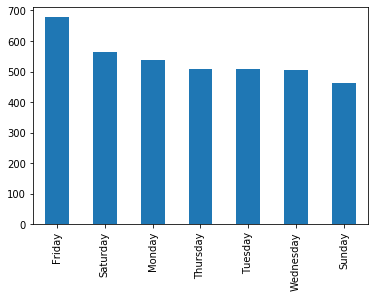

In [0]:
# Qué días desaparecieron más las personas
df_crimes.loc[df_crimes['OFFENSE_NAME'] == 'MISSING PERSON', 'DAY_OF_WEEK'].value_counts().plot.bar()

In [0]:
df_crimes.describe()

In [0]:
df_crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319073 entries, 0 to 319072
Data columns (total 18 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               319073 non-null object
OCCURRED_ON_DATE       319073 non-null datetime64[ns]
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
OFFENSE_NAME           319073 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object

In [0]:
# Cuáles son los delitos que implican tiroteos?
df_crimes['SHOOTING'].unique()

array([nan, 'Y'], dtype=object)

In [0]:
# Los registros que tengan el valor de nan ahora les asignaremos el valor de "N"
df_crimes['SHOOTING'].fillna('N', inplace=True)
df_crimes['SHOOTING'].unique()

array(['N', 'Y'], dtype=object)

In [0]:
df_crimes.loc[df_crimes['OFFENSE_NAME'] == 'MISSING PERSON'].groupby('DISTRICT').count()['INCIDENT_NUMBER']

DISTRICT
A1      99
A15     45
A7     143
B2     758
B3     963
C11    600
C6     144
D14    185
D4     278
E13    189
E18    234
E5     122
Name: INCIDENT_NUMBER, dtype: int64

In [0]:
# Vamos a crear una columna de la fecha del incidente en un nuevo formato que solo contenga la fecha del incidente y no la hora 
df_crimes['OCCURRED_ON_DATE_DAY'] = pd.to_datetime(df_crimes['OCCURRED_ON_DATE'].dt.strftime('%Y-%m-%d'))
df_crimes.head()

In [0]:
#Que dias ocurren mas crimines
df_crimes_per_day = df_crimes.groupby(by=['OCCURRED_ON_DATE_DAY']).count()['INCIDENT_NUMBER'].reset_index()
df_crimes_per_day


,OCCURRED_ON_DATE_DAY,INCIDENT_NUMBER
0,2015-06-15,249
1,2015-06-16,249
2,2015-06-17,234
3,2015-06-18,294
4,2015-06-19,289
...,...,...
1172,2018-08-30,257
1173,2018-08-31,269
1174,2018-09-01,264
1175,2018-09-02,227


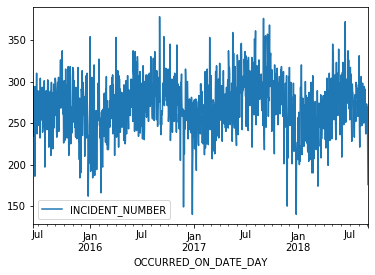

In [0]:

df_crimes_per_day.plot(x='OCCURRED_ON_DATE_DAY', y='INCIDENT_NUMBER'  )

In [0]:
import plotly.express as px

In [0]:
px.line(df_crimes_per_day, x='OCCURRED_ON_DATE_DAY', y='INCIDENT_NUMBER',   )

https://plot.ly/python/plotly-express/

In [0]:
# Vamos a guardar el dataset resultante en un nuevo archivo csv
df_crimes_per_day.to_csv('resultado_crimes_per_day.csv')

# Ejercicio 3:
######################################################## 
- ¿Encuentras alguna tendencia/patrón en el gráfico?

########################################################